# IMPORTING THE LIBRARIES

In [1]:
# Importing the libraries
import numpy as np
import matplotlib .pyplot as plt
import pandas as pd
import seaborn as sns

# Run before importing KMeans

import os
os.environ["OMP_NUM_THREADS"] = '1'

# LOADING THE DATASET

In [2]:
# Importing the dataset
dataset = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

## PERFORMING EXPLORATORY DATA ANALYSIS (EDA) ON THE DATASET

In [3]:
# Displaying the Frst Few Rows of the Dataset
dataset.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
# Displaying the Last Few Rows of the Dataset
dataset.tail()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,Female,23.664709,1.738836,133.472641,yes,yes,3.0,3.0,Sometimes,no,2.863513,no,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


In [5]:
# Displaying the Summary of Dataset Structure and Data Types
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [6]:
# Displaying the statistical Summary of Numerical Columns in the Dataset
dataset.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [7]:
# Displaying the Total Number of Columns and rows in the Dataset"
print(f"Number of samples (rows): {dataset.shape[0]}")
print(f"Number of features (columns): {dataset.shape[1]}")

Number of samples (rows): 2111
Number of features (columns): 17


In [8]:
#Checking for missing values in the dataset  
dataset.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [9]:
#Checking for duplicate rows
dataset.duplicated().sum()

24

In [10]:
# Remove any duplicate rows
#dataset.drop_duplicates(inplace=True)

In [11]:
#Selecting relevant features for Classification
#features = ['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'FCVC', 'NCP',  'SMOKE', 'CH2O', 'FAF', 'TUE']
#dataset = dataset[features]
#dataset

In [12]:
# Displaying the First Few Rows of Selected features of the Dataset
dataset.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


Text(0, 0.5, 'Weight (kg)')

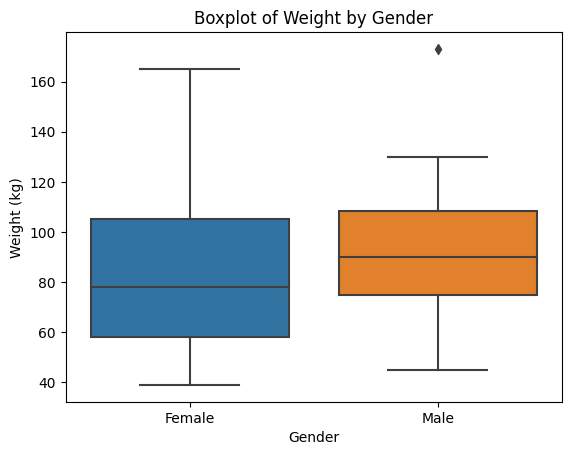

In [13]:
# Creating a boxplot of Weight grouped by Gender
sns.boxplot(x='Gender', y='Weight', data=dataset)
plt.title("Boxplot of Weight by Gender")
plt.xlabel("Gender")
plt.ylabel("Weight (kg)")

Text(0, 0.5, 'Family History with Overweight')

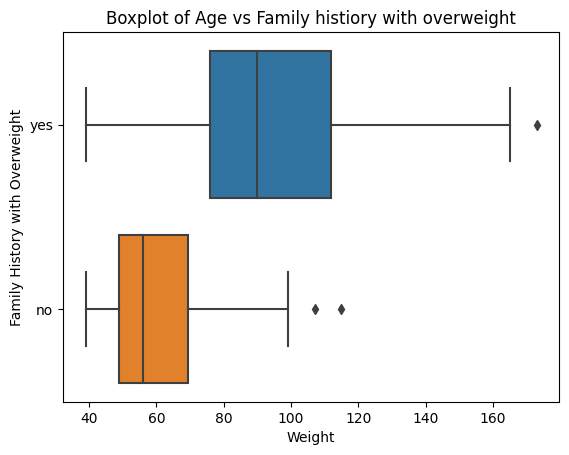

In [14]:
# Creating a boxplot of Weight and Family history with overweight
sns.boxplot(x='Weight', y='family_history_with_overweight', data=dataset)
plt.title("Boxplot of Age vs Family histiory with overweight")
plt.xlabel("Weight")
plt.ylabel("Family History with Overweight")

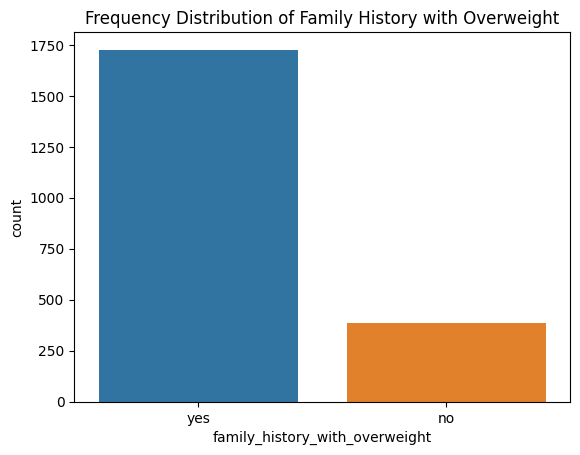

In [15]:
#Frequency Distribution of Family history with overweight
sns.countplot(x='family_history_with_overweight', data=dataset)
plt.title('Frequency Distribution of Family History with Overweight')
plt.show()

C:\Users\Hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


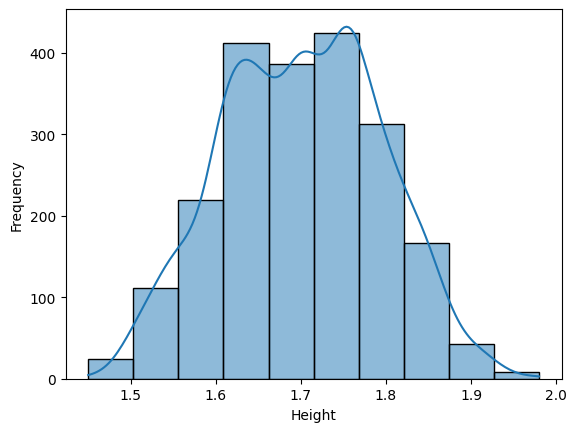

In [16]:
# Distribution and Density Plot of Height
sns.histplot(dataset['Height'], bins=10, kde=True)
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.show()

C:\Users\Hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


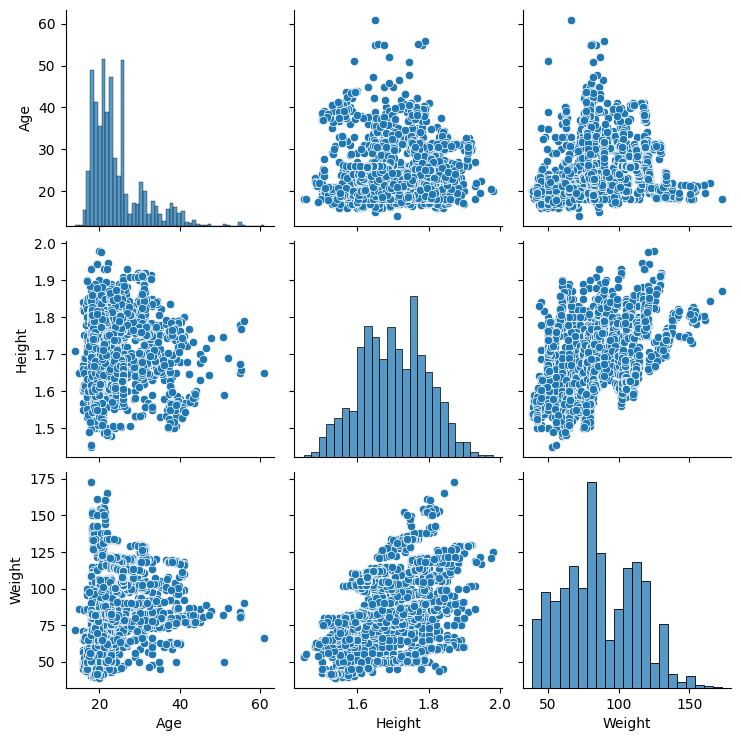

In [17]:
# Visualizing Pairwise Relationships for Selected Features in the Dataset
sns.pairplot(dataset.iloc[:,[0,1,2,3,4]])

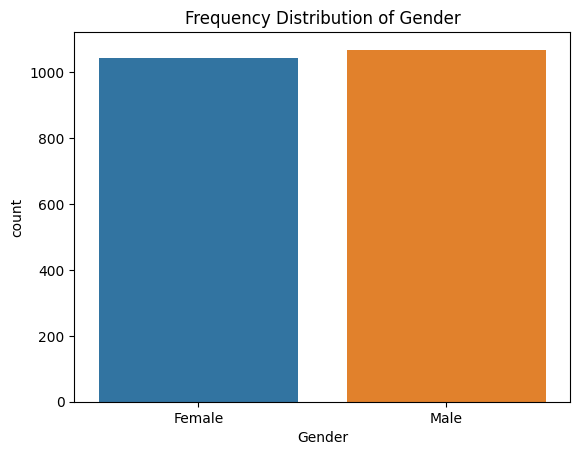

In [18]:
#Frequency Distribution of Gender
sns.countplot(x='Gender', data=dataset)
plt.title('Frequency Distribution of Gender')
plt.show()

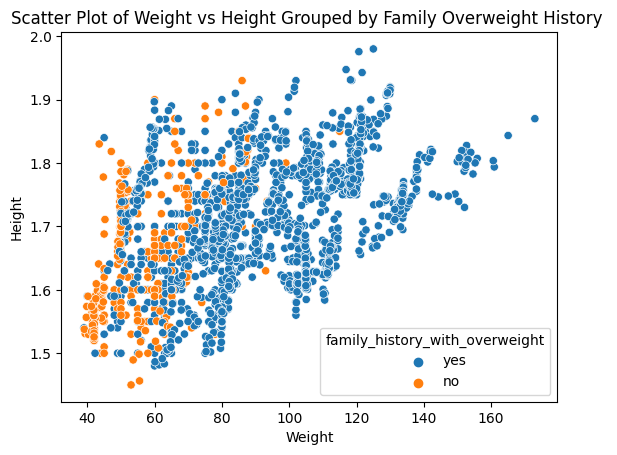

In [19]:
# Scatter Plot of Weight vs. Height  Grouped by Family Overweight History
sns.scatterplot(x='Weight', y='Height', hue='family_history_with_overweight', data=dataset)
plt.title('Scatter Plot of Weight vs Height Grouped by Family Overweight History ')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

C:\Users\Hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


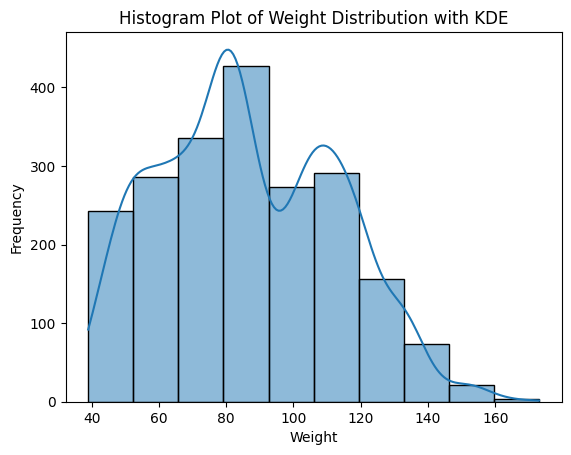

In [20]:
#Distribution of Weight with Histogram and KDE Curve
sns.histplot(dataset['Weight'], bins=10, kde=True)
plt.title('Histogram Plot of Weight Distribution with KDE')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()

C:\Users\Hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


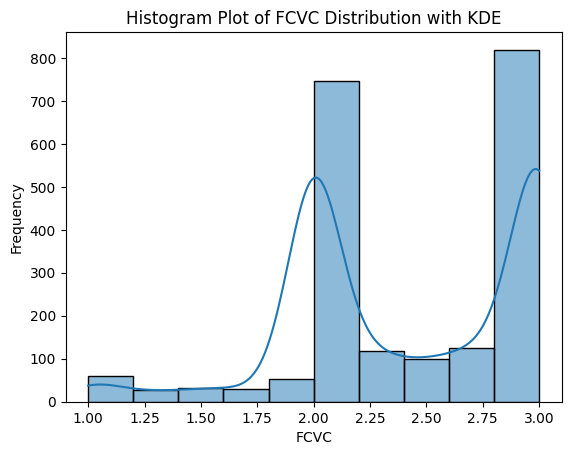

In [21]:
# Distribution of FCVC with Histogram and KDE Curve
sns.histplot(dataset['FCVC'], bins=10, kde=True)
plt.title('Histogram Plot of FCVC Distribution with KDE')
plt.xlabel('FCVC')
plt.ylabel('Frequency')
plt.show()

C:\Users\Hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


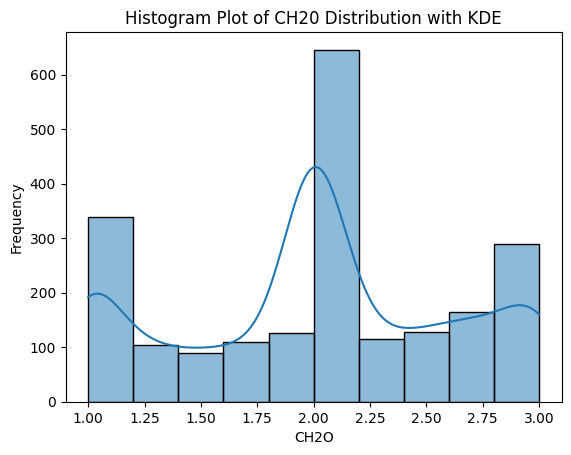

In [22]:
# Distribution of FCVC with Histogram and KDE Curve
sns.histplot(dataset['CH2O'], bins=10, kde=True)
plt.title('Histogram Plot of CH20 Distribution with KDE')
plt.xlabel('CH2O')
plt.ylabel('Frequency')
plt.show()

# DATA PREPROCESSING 

In [23]:
dataset

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [24]:
#Dropping the class label
dataset=dataset.drop(columns=["NObeyesdad"])

In [25]:
#Removing Binary Columns from the Dataset
categorical_cols=dataset.select_dtypes(include=['object']).columns.tolist()
dataset_others= dataset.drop(columns=categorical_cols)

In [26]:
dataset_others

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,21.000000,1.620000,64.000000,2.0,3.0,2.000000,0.000000,1.000000
1,21.000000,1.520000,56.000000,3.0,3.0,3.000000,3.000000,0.000000
2,23.000000,1.800000,77.000000,2.0,3.0,2.000000,2.000000,1.000000
3,27.000000,1.800000,87.000000,3.0,3.0,2.000000,2.000000,0.000000
4,22.000000,1.780000,89.800000,2.0,1.0,2.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,3.0,3.0,1.728139,1.676269,0.906247
2107,21.982942,1.748584,133.742943,3.0,3.0,2.005130,1.341390,0.599270
2108,22.524036,1.752206,133.689352,3.0,3.0,2.054193,1.414209,0.646288
2109,24.361936,1.739450,133.346641,3.0,3.0,2.852339,1.139107,0.586035


In [27]:
print(categorical_cols)

['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']


In [28]:
#Encoding Binary Categorical Features Using OneHotEncoder
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
encoder = OneHotEncoder(drop='first')
encoded_array = encoder.fit_transform(dataset[categorical_cols]).toarray()

encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(categorical_cols))

In [29]:
encoded_df=pd.concat([dataset_others,encoded_df],axis=1)

In [30]:
#Standardizing the Dataset Features with Min-Max Scaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler
sc_X = MinMaxScaler()
X = sc_X.fit_transform(encoded_df)
preprocessed = pd.DataFrame(X, columns=encoded_df.columns)

In [31]:
#Standardized Dataset of Continuous Features
preprocessed

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,family_history_with_overweight_yes,...,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0.148936,0.320755,0.186567,0.5,0.666667,0.500000,0.000000,0.500000,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.148936,0.132075,0.126866,1.0,0.666667,1.000000,1.000000,0.000000,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.191489,0.660377,0.283582,0.5,0.666667,0.500000,0.666667,0.500000,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.276596,0.660377,0.358209,1.0,0.666667,0.500000,0.666667,0.000000,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.170213,0.622642,0.379104,0.5,0.000000,0.500000,0.000000,0.000000,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0.148443,0.491943,0.689616,1.0,0.666667,0.364070,0.558756,0.453124,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2107,0.169850,0.563366,0.707037,1.0,0.666667,0.502565,0.447130,0.299635,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2108,0.181362,0.570200,0.706637,1.0,0.666667,0.527097,0.471403,0.323144,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2109,0.220467,0.546132,0.704079,1.0,0.666667,0.926170,0.379702,0.293017,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


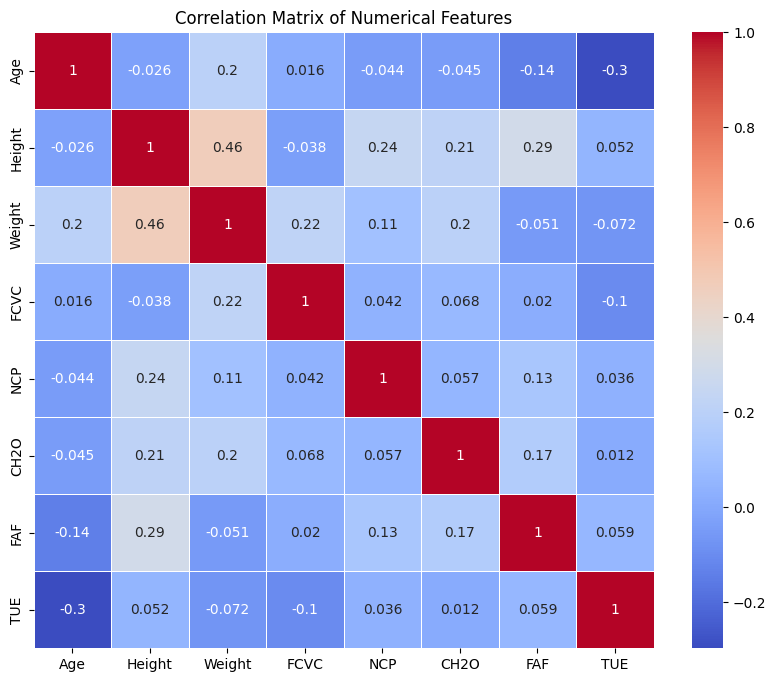

In [32]:
#Correlation Heatmap Matrix of the Processed Dataset
plt.figure(figsize=(10, 8))
correlation_matrix = preprocessed[dataset_others.columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# USING THE K-MEANS ALGORITHM FOR CLUSTERING

## (USING THE ELBOW METHOD)

C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:8

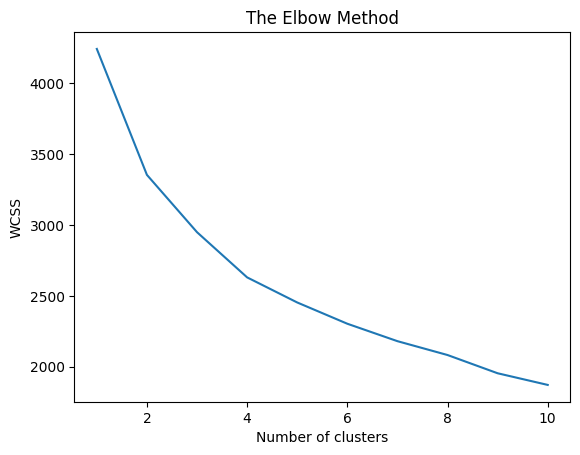

In [33]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(preprocessed)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:8

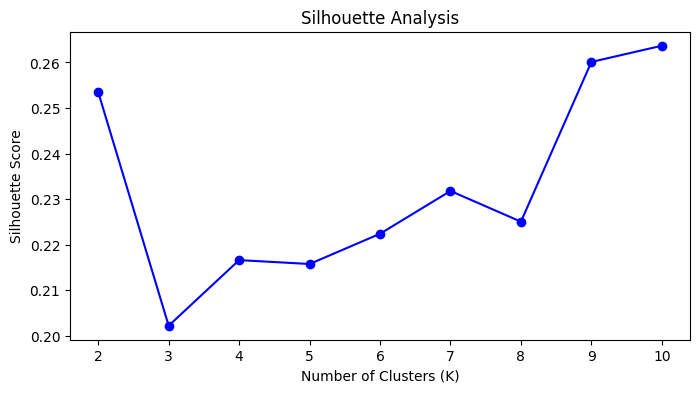

In [34]:
#Using the silhouette score to get optimal K 
from sklearn.metrics import silhouette_score
silhouette_scores = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(preprocessed.to_numpy())
    silhouette_avg = silhouette_score(preprocessed.to_numpy(), cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(8, 4))
plt.plot(K, silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()

In [35]:
#Fitting the K-means to the dataset
kmeans = KMeans(n_clusters =4 , init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_reduced)

NameError: name 'X_reduced' is not defined

In [ ]:
#Reducing dimensionality with Principal Component Analysis (PCA)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(preprocessed.to_numpy())

pca.explained_variance_ratio_

In [ ]:
sum(pca.explained_variance_ratio_)

In [ ]:
#Reducing Dimensionality of K-Means Cluster Centers with PCA
centroids_reduced = pca.transform(kmeans.cluster_centers_)

## VISUALIZING THE CLUSTERS FOR THE K-MEANS ALGORITHM

In [ ]:
# Visualizing the clusters
plt.figure(figsize=(8,8))
plt.scatter(X_reduced[y_kmeans ==0, 0],X_reduced[y_kmeans==0,1], s = 100, c ='red',label = 'Cluster 1')
plt.scatter(X_reduced[y_kmeans ==1, 0],X_reduced[y_kmeans==1,1], s = 100, c ='blue',label = 'Cluster 2')
plt.scatter(X_reduced[y_kmeans ==2, 0],X_reduced[y_kmeans==2,1], s = 100, c ='green',label = 'Cluster 3')
plt.scatter(X_reduced[y_kmeans ==3, 0],X_reduced[y_kmeans==3,1], s = 100, c ='cyan',label = 'Cluster 4')
plt.scatter(centroids_reduced[:, 0], centroids_reduced[:, 1], s=300, c='yellow', marker='o', label='Centroids')
plt.title('Clusters based on the Obesity Levels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# ANALYZING THE CLUSTERS USING CLASS LABELES, CLUSTER AND FEATURE DESCRIPTIONS FROM K-MEANS ALGORITHM

In [ ]:
set(y_kmeans)

In [ ]:
dataset_ = dataset.copy()

In [ ]:
#Assigning K-Means Cluster Labels to the Dataset
dataset_["Cluster_label"] = y_kmeans+1

In [ ]:
#Filtering Data for Cluster 1 Based on Assigned Labels
cluster_1 = dataset_[dataset_["Cluster_label"] == 1]

In [ ]:
#Statistical Summary of Features for Cluster 1
cluster_1.describe()

In [ ]:
#Filtering Data for Cluster 2 Based on Assigned Labels
cluster_2 = dataset_[dataset_["Cluster_label"] == 2]

In [ ]:
#Statistical Summary of Features for Cluster 2
cluster_2.describe()

In [ ]:
#Filtering Data for Cluster 3  Based on Assigned Labels
cluster_3 = dataset_[dataset_["Cluster_label"] == 3]

In [ ]:
#Statistical Summary of Features for Cluster 3
cluster_3.describe()

In [ ]:
#Filtering Data for Cluster 4  Based on Assigned Labels
cluster_4 = dataset_[dataset_["Cluster_label"] == 4]

In [ ]:
#Statistical Summary of Features for Cluster 4
cluster_4.describe()

In [ ]:
plt.figure(figsize=(12, 6))
 
data = [cluster_1, cluster_2, cluster_3, cluster_4]
column = "Weight"
i=1
for df in data:
    plt.subplot(1, 4, i)  # Arrange plots in 1 row and 4 columns
    plt.hist(df[[column]], bins=15, alpha=0.7, color='skyblue', edgecolor='black')
    plt.title(f"{column} Distribution")
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    i+=1
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
 
data = [cluster_1, cluster_2, cluster_3, cluster_4]
column = "FCVC"
i=1
for df in data:
    plt.subplot(1, 4, i)  # Arrange plots in 1 row and 4 columns
    plt.hist(df[[column]], bins=15, alpha=0.7, color='skyblue', edgecolor='black')
    plt.title(f"{column} Distribution")
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    i+=1
plt.tight_layout()
plt.show()

# USING THE AGGLOMERATIVE/HIERARCHICAL ALGORITHM FOR CLUSTERING

## USING THE DENDROGRAM TO GET OPTIMAL NUMBER OF CLUSTERS

In [ ]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(15,6))
dendrogram = sch.dendrogram(sch.linkage(X_reduced, method = 'ward'))
plt.title('Dendrogram for Obesity Levels ')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 4, metric ='euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X_reduced)

## VISUALIZING THE CLUSTERS FOR THE AGGLOMERATIVE/HIERARCHICAL ALGORITHM

In [ ]:
# Visualizing the clusters
plt.figure(figsize=(8,8))
plt.scatter(X_reduced[y_hc== 0, 0], X_reduced[y_hc == 0, 1], s = 100, c ='red', label = 'Cluster 1')
plt.scatter(X_reduced[y_hc== 1, 0], X_reduced[y_hc == 1, 1], s = 100, c ='blue', label = 'Cluster 2')
plt.scatter(X_reduced[y_hc== 2, 0], X_reduced[y_hc == 2, 1], s = 100, c ='green', label = 'Cluster 3')
plt.scatter(X_reduced[y_hc== 3, 0], X_reduced[y_hc == 3, 1], s = 100, c ='cyan', label = 'Cluster 4')
plt.title('Dendrogram for Obesity Levels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [ ]:
set(y_hc)

In [ ]:
dataset_hc = dataset.copy()

In [ ]:
#Assigning K-Means Cluster Labels to the Dataset
dataset_hc["Cluster_label"] = y_hc+1

In [ ]:
#Filtering Data for Cluster 1 Based on Assigned Labels
cluster_1 = dataset_hc[dataset_hc["Cluster_label"] == 1]

In [ ]:
dataset

In [ ]:
#Filtering Data for Cluster 1 Based on Assigned Labels
cluster_1 = dataset_hc[dataset_hc["Cluster_label"] == 1]

In [ ]:
#Statistical Summary of Features for Cluster 1
cluster_1.describe()

In [ ]:
#Filtering Data for Cluster 2 Based on Assigned Labels
cluster_2 = dataset_hc[dataset_hc["Cluster_label"] == 2]

In [ ]:
#Statistical Summary of Features for Cluster 2
cluster_2.describe()

In [ ]:
#Filtering Data for Cluster 3  Based on Assigned Labels
cluster_3 = dataset_hc[dataset_hc["Cluster_label"] == 3]

In [ ]:
#Statistical Summary of Features for Cluster 3
cluster_3.describe()

In [ ]:
#Filtering Data for Cluster 4  Based on Assigned Labels
cluster_4 = dataset_hc[dataset_hc["Cluster_label"] == 4]

In [ ]:
#Statistical Summary of Features for Cluster 4
cluster_4.describe()

In [ ]:
plt.figure(figsize=(12, 6))
 
data = [cluster_1, cluster_2, cluster_3, cluster_4]
column = "Weight"
i=1
for df in data:
    plt.subplot(1, 4, i)  # Arrange plots in 1 row and 4 columns
    plt.hist(df[[column]], bins=15, alpha=0.7, color='skyblue', edgecolor='black')
    plt.title(f"{column} Distribution")
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    i+=1
plt.tight_layout()
plt.show()